Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datos.csv')

Procesar datos

In [2]:
#Eliminar valores nulos
filter =df['Hum - %'] != '--'
df = df[filter]

#Corregir tipos de datos
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format='%m/%d/%y %H:%M')
numerics = ['Hum - %','Temp - °C','Inside Hum - %','Temp - °C','Inside Temp - °C']
for item in numerics:
    df[item] = pd.to_numeric(df[item])

#Agregar columna año y mes
df['year'] = pd.DatetimeIndex(df['Date & Time']).year
df['month'] = pd.DatetimeIndex(df['Date & Time']).month

#Eliminar columna innecesaria
df.drop(labels='Date & Time', axis=1, inplace=True)


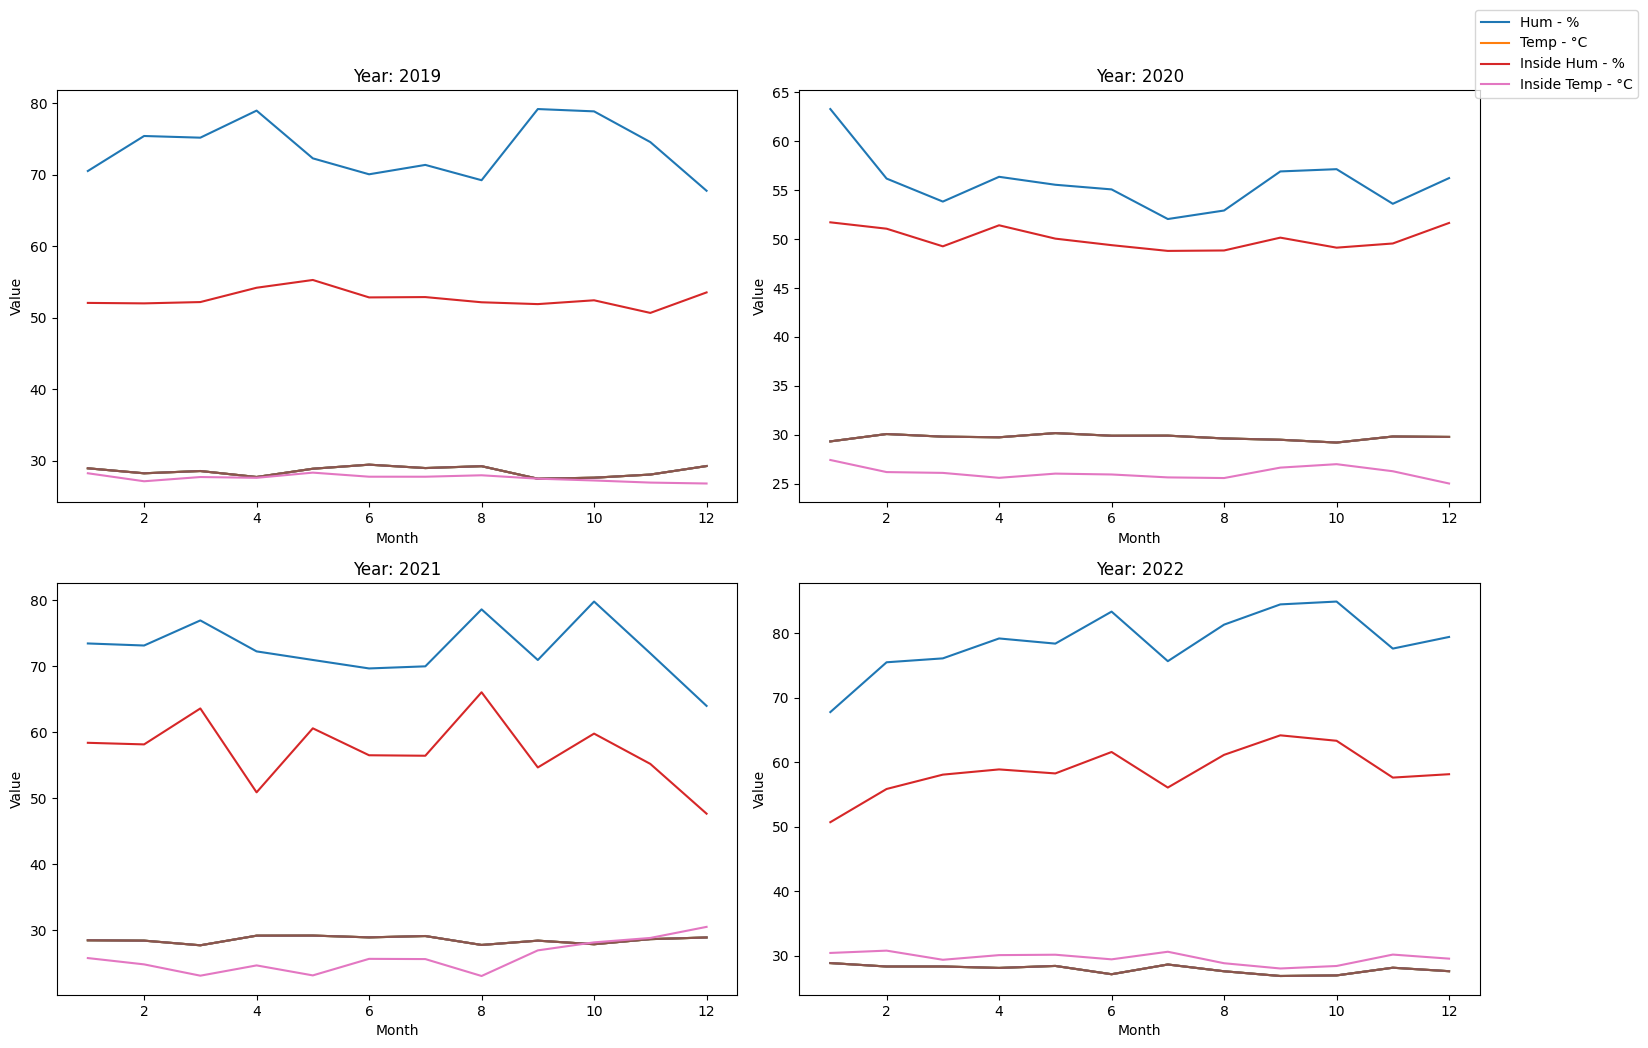

In [3]:
years = pd.unique(df['year'])
by_year = df.groupby('year')
lista = []
for year in years:
    df_year = by_year.get_group(year)
    year_mean = df_year.groupby('month')[numerics].mean()
    lista.append(year_mean)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

handles, labels = [], []  # Inicializa listas vacías para handles y etiquetas

for i, df_year in enumerate(lista):
    for numeric in numerics:
        # Grafica cada variable por separado con una etiqueta que sea el nombre de la variable
        line = ax[i].plot(df_year.index, df_year[numeric], label=numeric)[0]  # Corrección aquí
        if numeric not in labels:
            handles.append(line)
            labels.append(numeric)
    ax[i].set_title(f'Year: {years[i]}')
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Value')

# Utiliza las listas de handles y etiquetas para crear una leyenda única
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

In [6]:
vars

{1: 'Hum - %',
 2: 'Temp - °C',
 3: 'Inside Hum - %',
 4: 'Temp - °C',
 5: 'Inside Temp - °C'}